In [1]:
# Import necessary libraries
import os
import numpy as np
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing import image
import tensorflow as tf
import seaborn as sns
from keras.preprocessing import image
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, ComplementNB, GaussianNB
from tensorflow.keras import layers
import torch
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
from google.colab import drive
drive.mount('/content/drive')

# Data directories
train_dir = '/content/drive/MyDrive/A/Train'
test_dir = '/content/drive/MyDrive/A/Test'

Mounted at /content/drive


In [4]:
from tensorflow.keras.applications import ResNet50

# Load ResNet50 model
resnet_model = ResNet50(weights='imagenet', include_top=False)


94765736/94765736 [==============================] - 0s 0us/step


In [7]:
# Function to extract features from an image
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, ResNet50

def extract_features_resnet(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Assuming ResNet50 input size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    resnet_model = ResNet50(weights='imagenet', include_top=False)
    features = resnet_model.predict(img_array)
    features_flattened = features.flatten()

    return features_flattened


In [8]:
#load image and extract features
import os

x_train, y_train = [], []
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_resnet(os.path.join(class_dir, img_path))
        x_train.append(features)
        y_train.append(i)


1/1 [==============================] - 1s 1s/step


In [ ]:
# Load images and extract features
x_test, y_test = [], []
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_resnet(os.path.join(class_dir, img_path))
        x_test.append(features)
        y_test.append(i)

1/1 [==============================] - 1s 1s/step


In [ ]:
import torch

# Load the model using torch.load
model_classification = torch.load('/content/drive/MyDrive/NewModel.h5')

# Function to classify features using NewModel.h5
def classify_features(features):
    # Convert features to torch tensor
    features_tensor = torch.tensor(features)

    # Set the model to evaluation mode
    model_classification.eval()

    # Forward pass
    with torch.no_grad():
        predictions = model_classification(features_tensor)

    # Get the predicted classes
    _, predicted_classes = torch.max(predictions, 1)

    return predicted_classes.numpy()

Training Bernoulli Naive Bayes...
True Positives: 200
True Negatives: 1100
False Positives: 100
False Negatives: 100
Accuracy: 0.8666666666666667
Precision: 0.6917524752928361
Specificity: 0.9166666666666666
Sensitivity: 0.6666666666666667
F1 Score: 0.6622699465739652
Recall: 0.6666666666666667



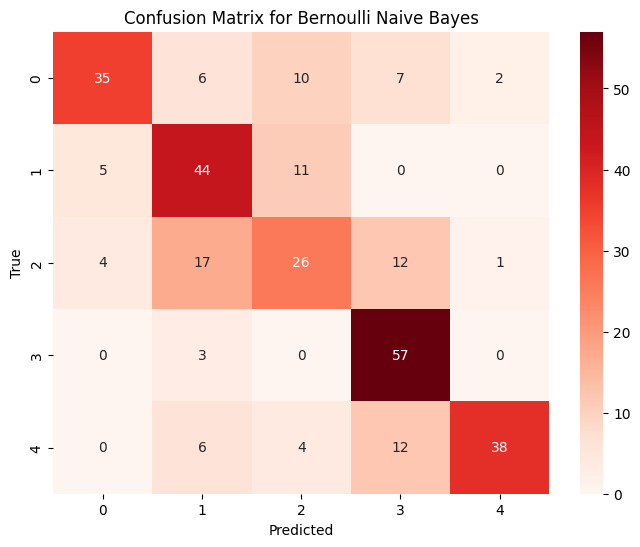

Training Multinomial Naive Bayes...
True Positives: 198
True Negatives: 1098
False Positives: 102
False Negatives: 102
Accuracy: 0.864
Precision: 0.6828309163323837
Specificity: 0.915
Sensitivity: 0.6599999999999999
F1 Score: 0.6541131765430831
Recall: 0.6599999999999999



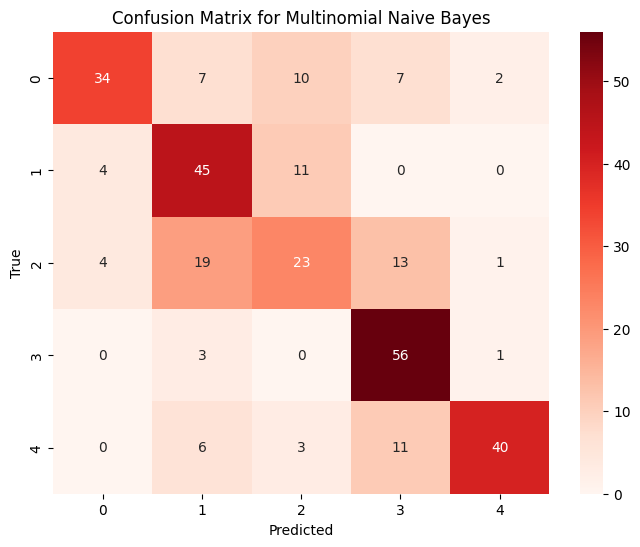

Training Complement Naive Bayes...
True Positives: 202
True Negatives: 1102
False Positives: 98
False Negatives: 98
Accuracy: 0.8693333333333333
Precision: 0.7044623163324171
Specificity: 0.9183333333333333
Sensitivity: 0.6733333333333333
F1 Score: 0.6594966249731744
Recall: 0.6733333333333333



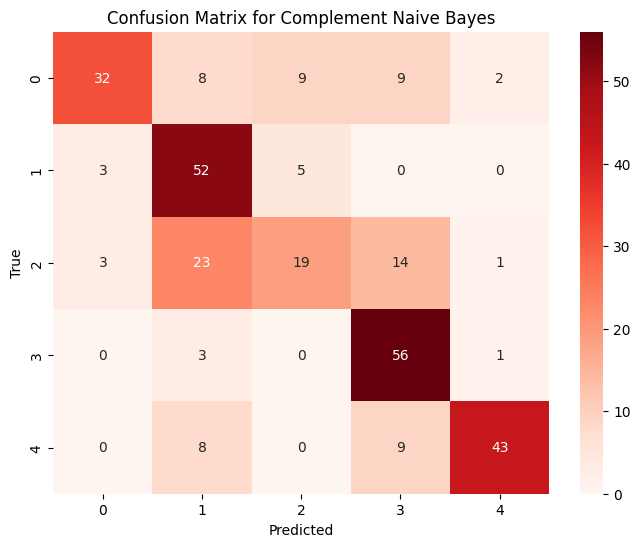

Training Gaussian Naive Bayes...
True Positives: 300
True Negatives: 1200
False Positives: 0
False Negatives: 0
Accuracy: 1.0
Precision: 1.0
Specificity: 1.0
Sensitivity: 1.0
F1 Score: 1.0
Recall: 1.0



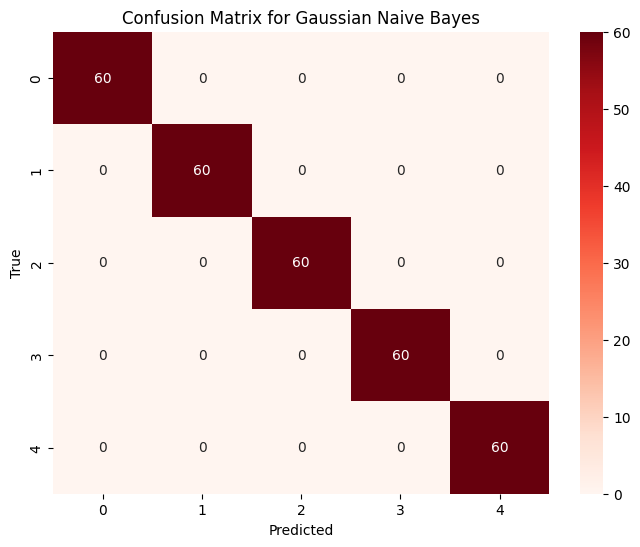

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, ComplementNB, GaussianNB

# Flatten the features
x_train_flat = np.array([feature.flatten() for feature in x_train])
x_test_flat = np.array([feature.flatten() for feature in x_test])

# List of classifiers to try
classifiers = [BernoulliNB, MultinomialNB, ComplementNB, GaussianNB]
classifier_names = ['Bernoulli Naive Bayes', 'Multinomial Naive Bayes', 'Complement Naive Bayes', 'Gaussian Naive Bayes']

for clf, name in zip(classifiers, classifier_names):
    print(f"\033[1mTraining {name}...\033[0m")

    # Train classifier
    model = clf()
    model.fit(x_train_flat, y_train)

    # Predict on test set
    y_pred = model.predict(x_test_flat)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Compute TP, TN, FP, FN for each class
    TP = np.diag(cm)
    FP = np.sum(cm, axis=0) - TP
    FN = np.sum(cm, axis=1) - TP
    num_classes = cm.shape[0]
    TN = []
    for i in range(num_classes):
        temp = np.delete(cm, i, 0)   # delete ith row
        temp = np.delete(temp, i, 1)  # delete ith column
        TN.append(sum(sum(temp)))

    # Compute overall TP, TN, FP, FN
    overall_TP = np.sum(TP)
    overall_TN = np.sum(TN)
    overall_FP = np.sum(FP)
    overall_FN = np.sum(FN)

    # Compute accuracy, precision, specificity, sensitivity, F1-score, recall
    accuracy = (overall_TP + overall_TN) / (overall_TP + overall_TN + overall_FP + overall_FN)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    specificity = overall_TN / (overall_TN + overall_FP)

    # Print performance metrics
    print(f'True Positives: {overall_TP}')
    print(f'True Negatives: {overall_TN}')
    print(f'False Positives: {overall_FP}')
    print(f'False Negatives: {overall_FN}')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Specificity: {specificity}')
    print(f'Sensitivity: {recall}')
    print(f'F1 Score: {f1}')
    print(f'Recall: {recall}\n')

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=range(num_classes), yticklabels=range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()